In [1]:
# import the necessary packages
from collections import deque
import numpy as np
import cv2
import math
import imutils
import matplotlib.pyplot as plt
 

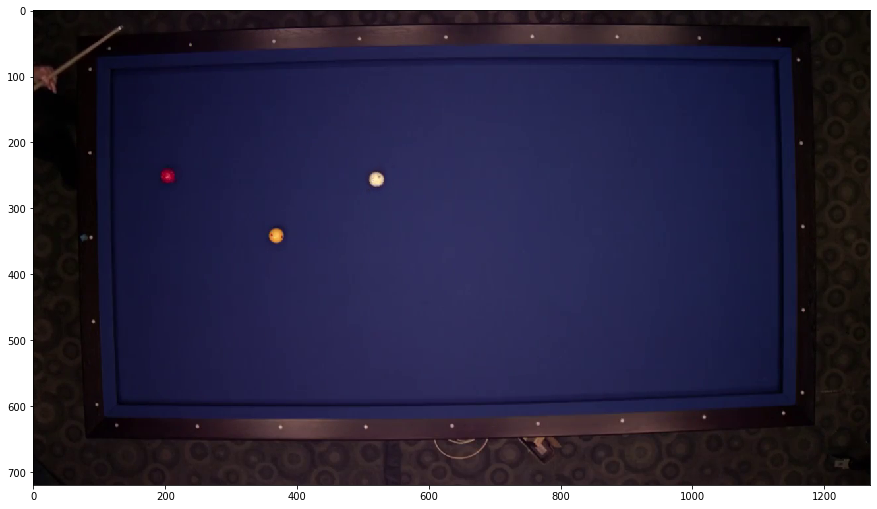

In [19]:
# load video
vs = cv2.VideoCapture("videos/pool.mp4")
frame_number = 270
vs.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1);
# Get frame from video
res, frame = vs.read()

# show image
plt.figure(figsize = (15,15))
plt.imshow(frame[:, :, ::-1])
plt.show()

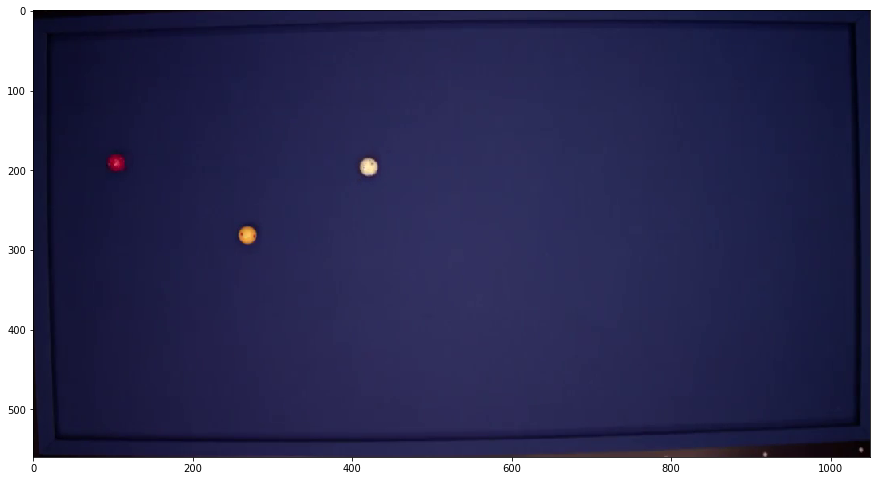

In [20]:
# crop image
frame = frame[60:620, 100:1150]

plt.figure(figsize = (15,15))
plt.imshow(frame[:, :, ::-1])
plt.show()

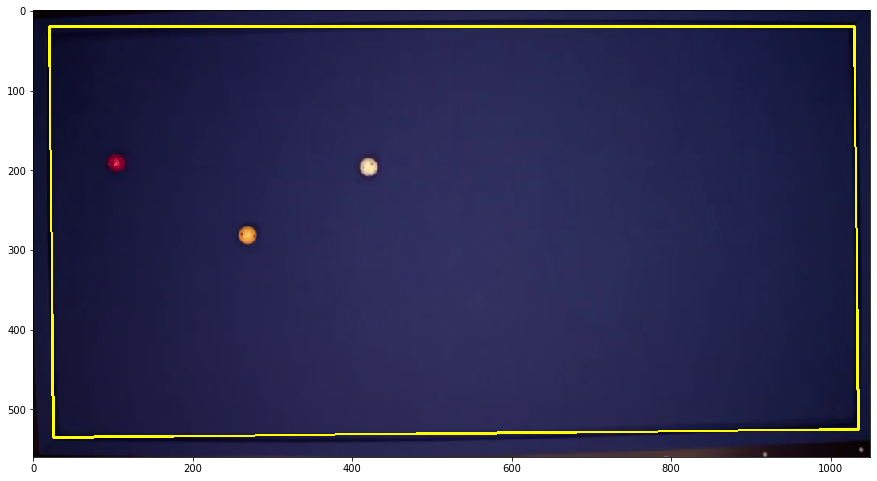

In [54]:
# copy image
frame_with_bank = frame.copy()

top_left = (20, 20)
top_right = (1030, 20)
bottom_left = (25, 535)
bottom_right = (1035, 525)
# top bank
cv2.line(frame_with_bank, top_left, top_right, (0, 255, 255), 2)
# left bank
cv2.line(frame_with_bank, top_left, bottom_left, (0, 255, 255), 2)
# bottom
cv2.line(frame_with_bank, bottom_left, bottom_right, (0, 255, 255), 2)
# right
cv2.line(frame_with_bank, bottom_right, top_right, (0, 255, 255), 2)

plt.figure(figsize = (15,15))
plt.imshow(frame_with_bank[:, :, ::-1])
plt.show()

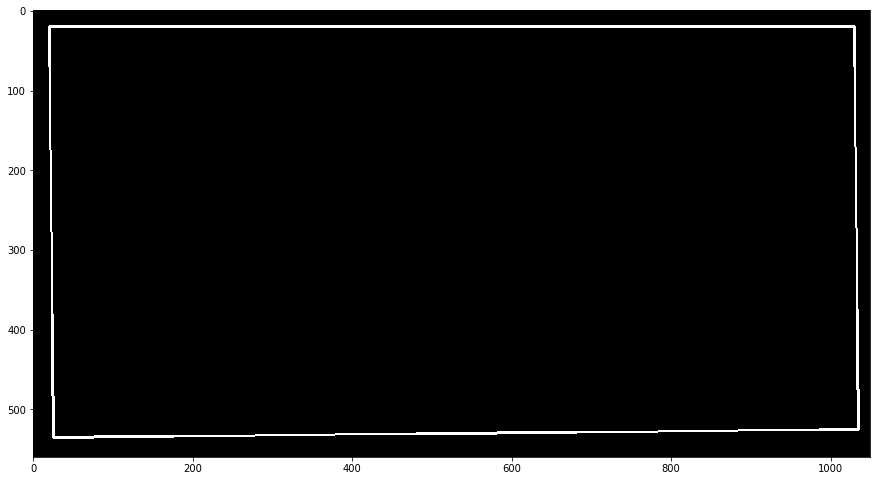

In [57]:
# lower and upper boundaries of the "white"
bank_mask = np.zeros((len(frame_with_bank), len(frame_with_bank[0]), 3), dtype = "uint8")
# top bank
cv2.line(bank_mask, top_left, top_right, (255, 255, 255), 2)
# left bank
cv2.line(bank_mask, top_left, bottom_left, (255, 255, 255), 2)
# bottom
cv2.line(bank_mask, bottom_left, bottom_right, (255, 255, 255), 2)
# right
cv2.line(bank_mask, bottom_right, top_right, (255, 255, 255), 2)

plt.figure(figsize = (15,15))
plt.imshow(bank_mask, cmap='gray')
plt.show()

In [ ]:
# clean mask
mask = cv2.erode(mask, None, iterations=1)
mask = cv2.dilate(mask, None, iterations=1)

plt.figure(figsize = (15,15))
plt.imshow(mask, cmap='gray')
plt.show()